## Project No2 - Concentration Theorems

When writing code, we recommend you to be as modular as possible. For example, if you are running multiple experiments for different choices of parameters, it may be convenient to write a function that does one experiment and then make multiple calls to the same function. Follow the _do not repeat yourself_ rule when writing code! 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

import matplotlib as mpl

mpl.rcParams['font.size'] = 16

### 0. Setup 

We will consider $X_1, X_2, \ldots, X_n$ a sequence of i.i.d. random variables with mean $\mathbb{E}[X_1] = \mu$. We define the sample mean as 
$$
\bar X_n = \frac{1}{n} \sum_{i=1}^n X_i
$$
The objective of this project is to study the behavior of $\bar X_n$ as $n \rightarrow \infty$. 

### 1. Law of Large Numbers

Here we are going to focus in the convergence in probability and almost surely of the sample mean of i.i.d. random variables. Remember that a sequence of random variables $Y_1, Y_2, \ldots$ converges in probability to a random variable $Y$ if for every $\epsilon > 0$ we have 
$$
\lim_{n \rightarrow \infty} \mathbb P \left( | Y_n - Y | > \epsilon \right) = 0
$$
The **weak law of large numbers** states 

> The sample mean $\bar X_n$ converges in probability to $\mu$.

The **strong law of large numbers** states a more strict sense in which this convergence happens

> The sample mean $\bar X_n$ converges almost surely to $\mu$. 

Let's see how these two behave numerically.

#### 1.1. Gaussian case

Consider the simple case where $X_i \sim N(0,1)$. Compute the sample mean for increasing values of $n$ and show how the sample mean converges to $0$. To do this, you can simply show a plot of the sample mean as a function of $n$. 

***Tip:*** You can compute the sample mean of a normal random variable by simply doing
```python
n = 100
one_sample_mean = np.mean(np.random.normal(loc=0.0, scale=1.0, size=n))
```
The same works if you want to compute a total of `n_sim` sample means:
```python
n = 100
n_sim = 500
many_sample_means = np.mean(np.random.normal(loc=0.0, scale=1.0, size=(n, n_sim)), axis=0)
```

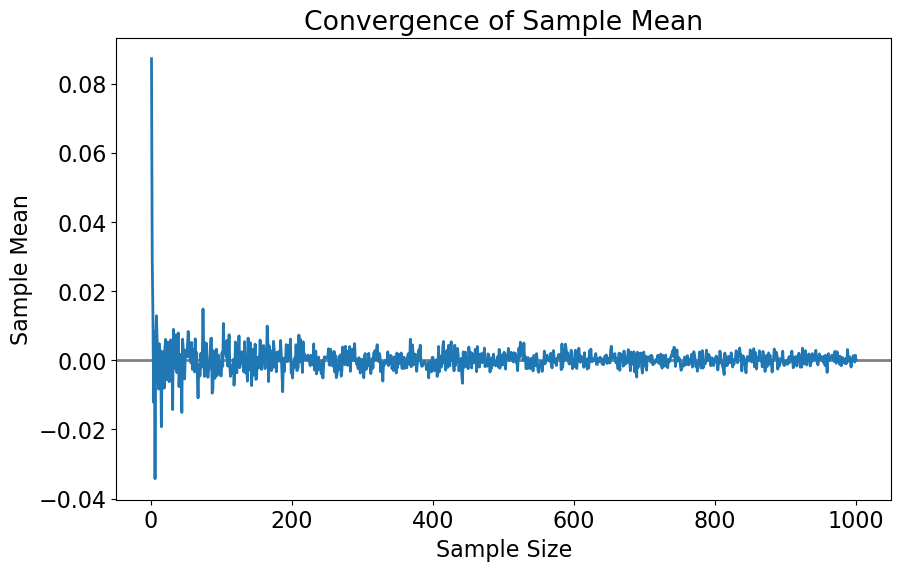

In [2]:
def sample_mean_convergence(n_max, n_sim):
    sample_means = []
    for n in range(1, n_max+1):
        means = np.mean(np.random.normal(loc=0.0, scale=1.0, size=(n, n_sim)), axis=0)
        sample_means.append(np.mean(means))
    return sample_means

def plot_convergence(sample_means):
    plt.figure(figsize=(10, 6))
    plt.axhline(0, color='gray', lw=2)  # plot the true mean
    plt.plot(range(1, len(sample_means)+1), sample_means, lw=2)
    plt.xlabel('Sample Size')
    plt.ylabel('Sample Mean')
    plt.title('Convergence of Sample Mean')
    plt.show()

# Parameters
n_max = 1000  # maximum sample size
n_sim = 500  # number of simulations

# Calculate and plot convergence
sample_means = sample_mean_convergence(n_max, n_sim)
plot_convergence(sample_means)

#### 1.2. Beta distribution

Now, repeat the same experiment but for a Beta distribution with parameters of your choice. Remember that the mean of a Beta distribution with parameters $a$ and $b$ is $a / (a+b)$. 

For this section, it is important that you compute the sample mean as you increase the value of $n$ *for the same realization of the random variables $X_i$*. To do this, first sample all the values of $X_1, X_2, \ldots, X_{n_{max}}$ just one time and then compute the partial averages $\bar X_n$ for different values of $n \leq n_{max}$. 

Make this plot is logarithmic scale for both axes. This is how your solution should look like. If you kernel dies when running the simulations, try reducing the total number of samples.

<img src="solution_1_2.png" alt="Solution" />

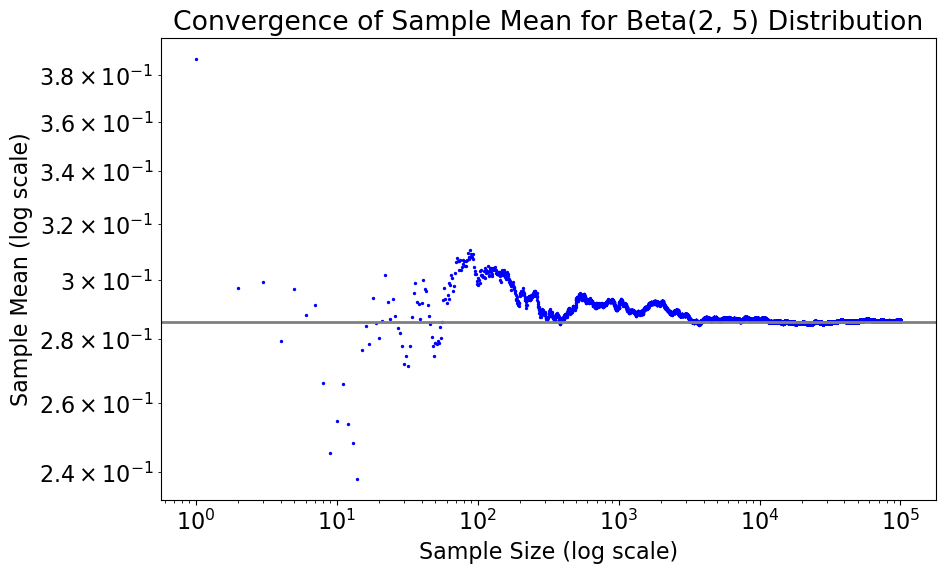

In [3]:
def beta_sample_mean_convergence(a, b, n_max):
    # Generate samples
    samples = np.random.beta(a, b, size=n_max)
    # Compute partial averages
    partial_averages = np.cumsum(samples) / (np.arange(n_max) + 1)
    return partial_averages

def plot_beta_convergence(partial_averages, a, b):
    plt.figure(figsize=(10, 6))
    plt.axhline(a / (a + b), color='gray', lw=2)  # plot the true mean
    # Using scatter to plot each point individually
    plt.scatter(range(1, len(partial_averages)+1), partial_averages, s=2, color='blue')
    plt.xscale('log')  # Set the x-axis to a logarithmic scale
    plt.yscale('log')  # Set the y-axis to a logarithmic scale
    plt.xlabel('Sample Size (log scale)')
    plt.ylabel('Sample Mean (log scale)')
    plt.title(f'Convergence of Sample Mean for Beta({a}, {b}) Distribution')
    plt.show()
    
# Parameters
a, b = 2, 5  # Parameters for Beta distribution
n_max = 100000

# Calculate and plot convergence
partial_averages = beta_sample_mean_convergence(a, b, n_max)
plot_beta_convergence(partial_averages, a, b)

**To Discuss:** When doing this calculations, what time of convergence are we studying? almost surely or in probability? 

**To Discuss:** Can you identify the general trend in the previous plot? Can you give meaning the low peaks in the plot? 

In [4]:
# 1: Type of Convergence

# When doing these calculations and plotting the sample mean against the sample size, 
# we are primarily studying convergence in probability (Weak Law of Large Numbers).

# Convergence in Probability (Weak Law): 
# We are observing how the sample mean changes with different sample sizes,noting that as the sample size increases, 
# the sample mean gets closer to the true mean. 
# This is a demonstration of the weak law of large numbers, which states that the sample average (or sum) 
# will converge in probability to the expected value.

# Convergence Almost Surely (Strong Law): 
# To study convergence almost surely, we would need to look at the proportion of sample paths that converge 
# to the expected value as the sample size increases, demonstrating that the probability that a sequence 
# of random variables converges to a particular value is 1.


# 2: General Trend and Low Peaks

# General Trend: In general, we observe that the sample mean approaches the true mean as the sample size increases, 
# although there may be fluctuations. This trend demonstrates the Law of Large Numbers, confirming that as the 
# number of trials increases, the experimental mean approaches the theoretical mean.

# Low Peaks: The low peaks (or any fluctuation) in the plot represent the inherent variability or randomness 
# in the samples. Even as the sample size increases, there's no guarantee that each additional sample will 
# be close to the true mean. However, the overall trend should still show convergence to the true mean. 
# This is the nature of stochastic processes – there will always be some level of randomness and unpredictability 
# in the short term, but the long-term behavior is predictable.


#### 1.3. Compute the probability

Now, instead of evaluating the value of $\bar X_n$, compute the probability $\mathbb P \left( | \bar X_n | > \epsilon \right)$ for different values of $n$ and $\epsilon$ and plot the result as a function of $n$. What do you observe? See the next item for an example of the solution for this problem.

Progress:  0 %
Progress:  5 %
Progress:  10 %
Progress:  15 %
Progress:  20 %
Progress:  25 %
Progress:  30 %
Progress:  35 %
Progress:  40 %
Progress:  45 %
Progress:  50 %
Progress:  55 %
Progress:  60 %
Progress:  65 %
Progress:  70 %
Progress:  75 %
Progress:  80 %
Progress:  85 %
Progress:  90 %
Progress:  95 %


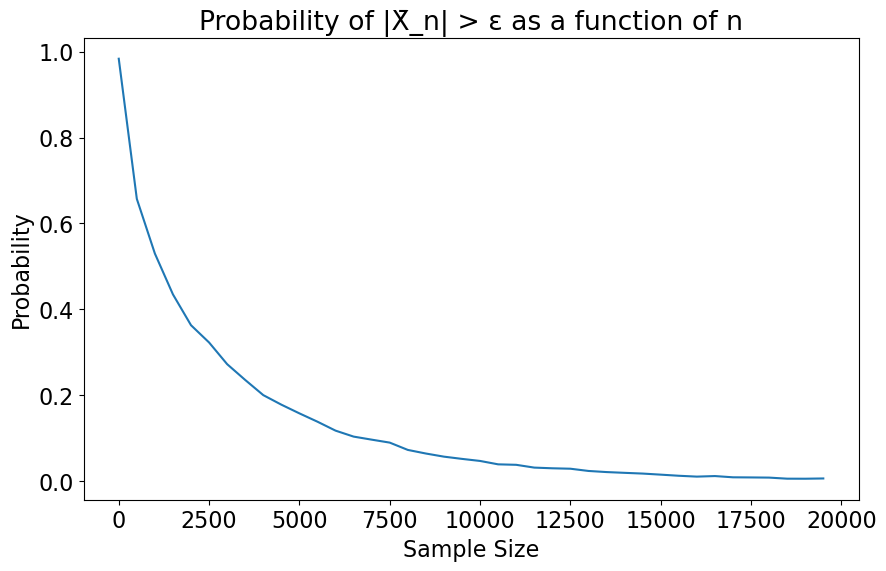

In [81]:
# Parameters
epsilon = 0.02  
n_max = 20_000
n_step_size = 500
n_sim = 10_000

# Function to compute the probability
def compute_probability(n, epsilon, n_sim):
    count = 0
    for _ in range(n_sim):
        samples = np.random.normal(loc=0.0, scale=1.0, size=n)
        sample_mean = np.mean(samples)
        if abs(sample_mean) > epsilon:
            count += 1
    return count / n_sim

# Compute probabilities
probs = np.zeros(n_max // n_step_size)
for idx, n in enumerate(range(1, n_max+1, n_step_size)):
    _probs = compute_probability(n, epsilon, n_sim)
    probs[idx] = _probs
    
    # Print out the progress:
    if (np.round(1000*n/(n_max+1),0) % 50) == 0:
        print("Progress: ", 100*(n-1)//n_max, "%")

# Plot the probabilities
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_max+1, n_step_size), probs)
plt.xlabel('Sample Size')
plt.ylabel('Probability')
plt.title('Probability of |X̄_n| > ε as a function of n')
plt.show()

#### 1.4. Concentration bounds

Repeat the same plot that in the last item and show how it compares with the upper bound obtain from using Chebyshev's inequality
$$
\mathbb P \left( | \bar X_n | > \epsilon \right) \leq \frac{1}{n \epsilon^2}
$$
and the Chernoff bound
$$
\mathbb P \left( | \bar X_n | > \epsilon \right) \leq 2 \exp \left( - \frac{\epsilon^2 n}{2} \right)
$$
At the end of the day, you should obtain something like this

<img src="solution_1_34.png" alt="Solution" />

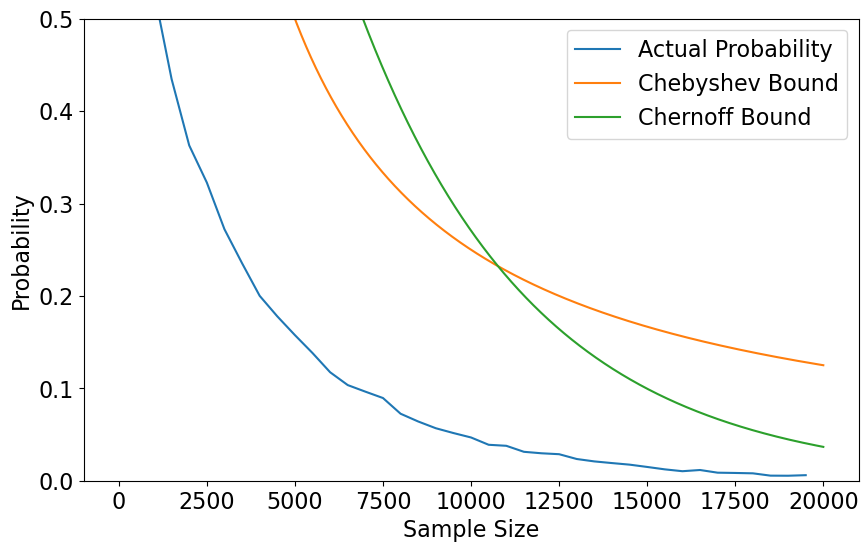

In [87]:
import math

# Parameters
epsilon = 0.02  
n_max = 20_000
n_step_size = 500
n_sim = 10_000

# Compute the Chebyshev bound
chebyshev_bounds = [1 / (n * epsilon**2) for n in range(1, n_max+1)]

# Compute the Chernoff bound
chernoff_bounds = [2 * math.exp(-epsilon**2 * n / 2) for n in range(1, n_max+1)]

# Plot the probabilities and the bounds
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_max+1, n_step_size), probs, label='Actual Probability')
plt.plot(range(1, n_max+1), chebyshev_bounds, label='Chebyshev Bound')
plt.plot(range(1, n_max+1), chernoff_bounds, label='Chernoff Bound')
plt.xlabel('Sample Size')
plt.ylabel('Probability')
plt.ylim([0, 0.5])
#plt.yscale('log') 
plt.legend()
plt.show()

### 2. Central Limit theorem 

Let's first state one more time the Central Limit Theorem

> Consider $X_1, X_2, \ldots, X_n$ a sequence of i.i.d. random variables with mean $\mathbb{E}[X_1] = \mu$ and finite variance $\mathbb{V}ar[X_1] = \sigma^2$. If call 
$$
\bar X_n = \frac{1}{n} \sum_{i=1}^n X_i
$$
the sample mean, then 
$$
\sqrt{n} \frac{\bar X_n - \mu}{\sigma}
$$
converges in distribution to the standard Normal distribution $N(0,1)$.



#### 2.1. Continuous case

Pick a continuous random variable with bounded second moment and show that the central limit theorem holds numerically. Sample the sample mean $\bar X_n$ for various numbers of $n$ and show that $\sqrt{n}(\bar X_n - \mu) / \sigma$ converges to the standard normal distribution.

This is how the solution should look like for the mean of Beta distributions and a total of 10000 simulations. 

<img src="solution_2_1.png" alt="Solution" />

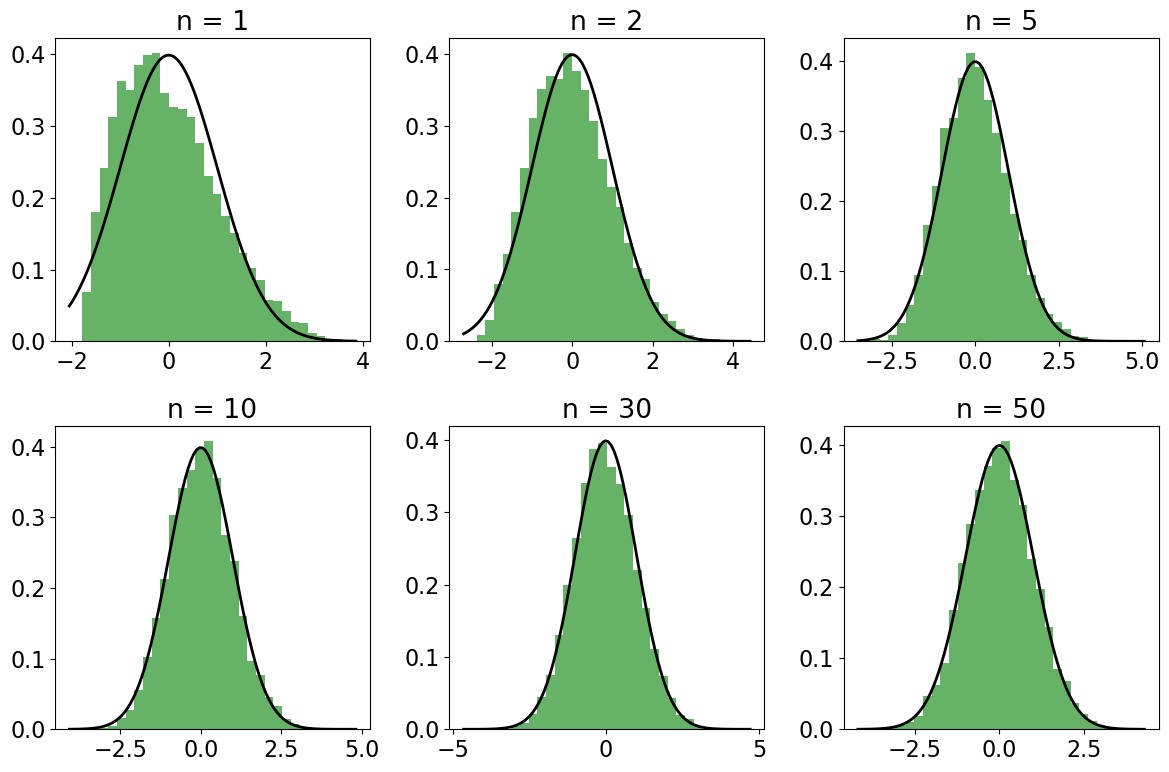

In [8]:
# Parameters
a, b = 2, 5  # parameters for Beta distribution
mu = a / (a + b)  # mean of the Beta distribution
sigma = np.sqrt((a * b) / ((a + b)**2 * (a + b + 1)))  # standard deviation of the Beta distribution
n_sim = 10000  # number of simulations

# Function to compute the normalized sample mean
def compute_normalized_sample_mean(n):
    samples = np.random.beta(a, b, size=(n, n_sim))
    sample_means = np.mean(samples, axis=0)
    return np.sqrt(n) * (sample_means - mu) / sigma

# Values for n
n_values = [1, 2, 5, 10, 30, 50]

# Plot histograms
plt.figure(figsize=(12, 8))
for i, n in enumerate(n_values):
    plt.subplot(2, 3, i + 1)
    normalized_sample_means = compute_normalized_sample_mean(n)
    plt.hist(normalized_sample_means, bins=30, density=True, alpha=0.6, color='g')
    
    # Plot the standard normal distribution for comparison
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, 0, 1)
    plt.plot(x, p, 'k', linewidth=2)
    
    title = f'n = {n}'
    plt.title(title)

plt.tight_layout()
plt.show()

#### 2.2. Discrete case

Repeat the experiment but now with a discrete random variable. When plotting the histogram, be careful on how you define the bins. 


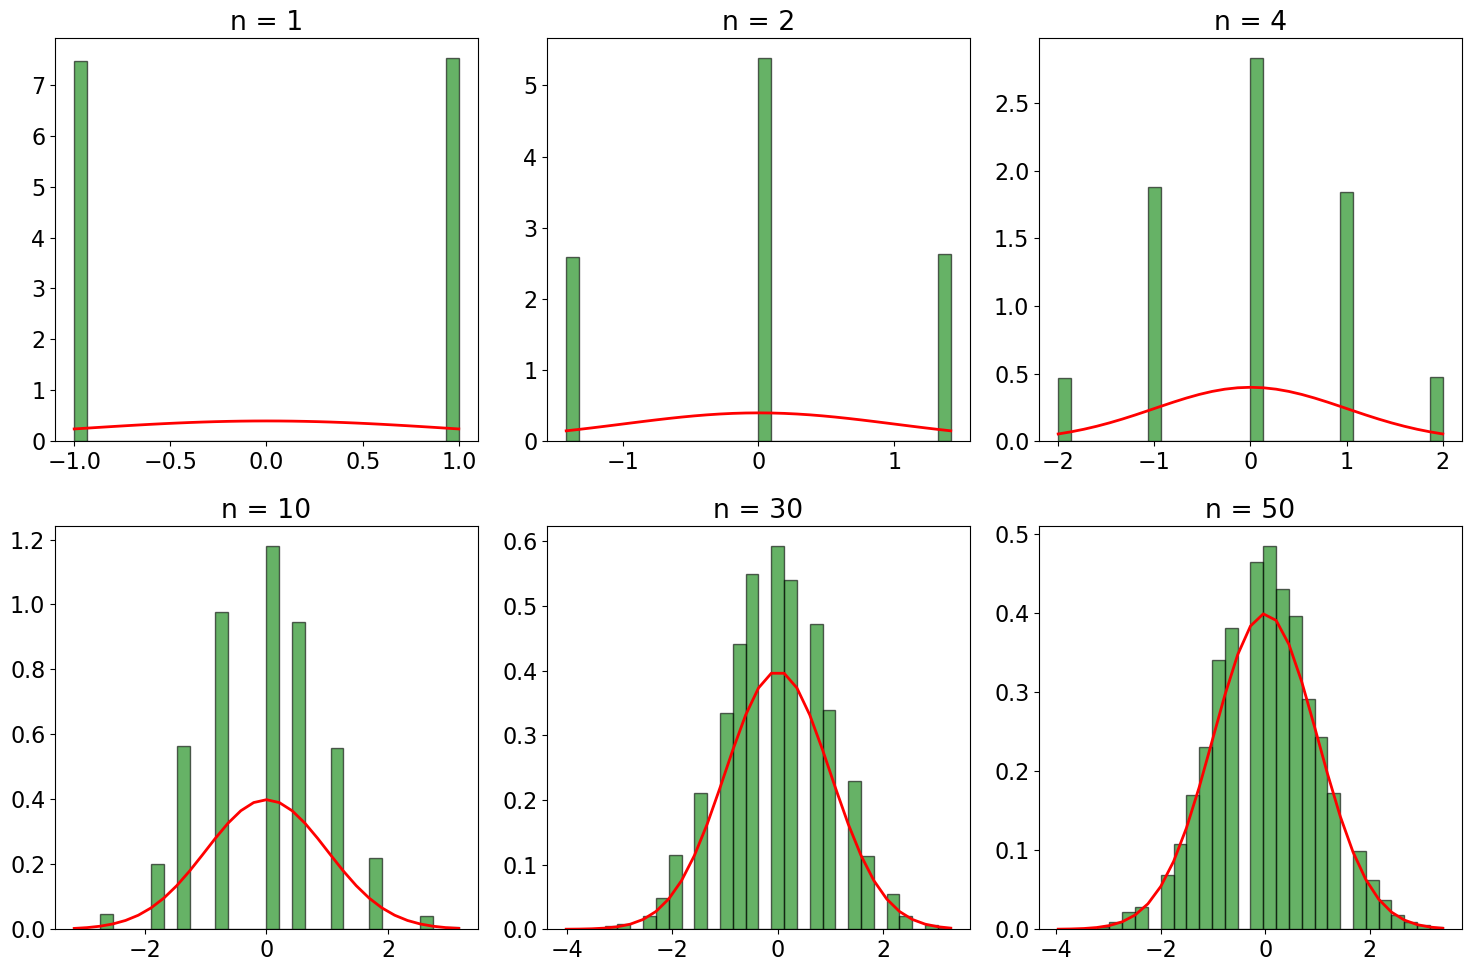

In [9]:
# Parameters
p = 0.5  # probability of success
mu = p  # mean of the Bernoulli distribution
sigma = np.sqrt(p * (1 - p))  # standard deviation of the Bernoulli distribution
n_sim = 10000  # number of simulations

# Values of n to consider
n_values = [1, 2, 4, 10, 30, 50]


def compute_normalized_sample_mean(n):
    samples = np.random.binomial(n=1, p=p, size=(n, n_sim))  # n trials and n_sim simulations
    sample_means = np.mean(samples, axis=0)  # mean across the samples
    return np.sqrt(n) * (sample_means - mu) / sigma


# Plot histograms and normal PDF
plt.figure(figsize=(15, 10))

for i, n in enumerate(n_values):
    plt.subplot(2, 3, i + 1)
    normalized_sample_means = compute_normalized_sample_mean(n)
    
    # Make the histograms
    count, bins, ignored = plt.hist(normalized_sample_means, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')
    
    # Plot the standard normal distribution for comparison
    plt.plot(bins, stats.norm.pdf(bins, 0, 1), linewidth=2, color='r')
    plt.title(f'n = {n}')

plt.tight_layout()
plt.show()

#### 2.3. [Optional] Distribution without second moment

Consider now a distribution with defined mean without finite second moment. In principle, the central limit theorem does not apply for this case. Generate a simulation of the sample mean for a distribution with these properties and try to understand the behavior of the scaled sample mean as $n$ increases. You may find interesting the reading about [stable distributions](https://en.wikipedia.org/wiki/Stable_distribution).

/tmp/ipykernel_48/3161727533.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


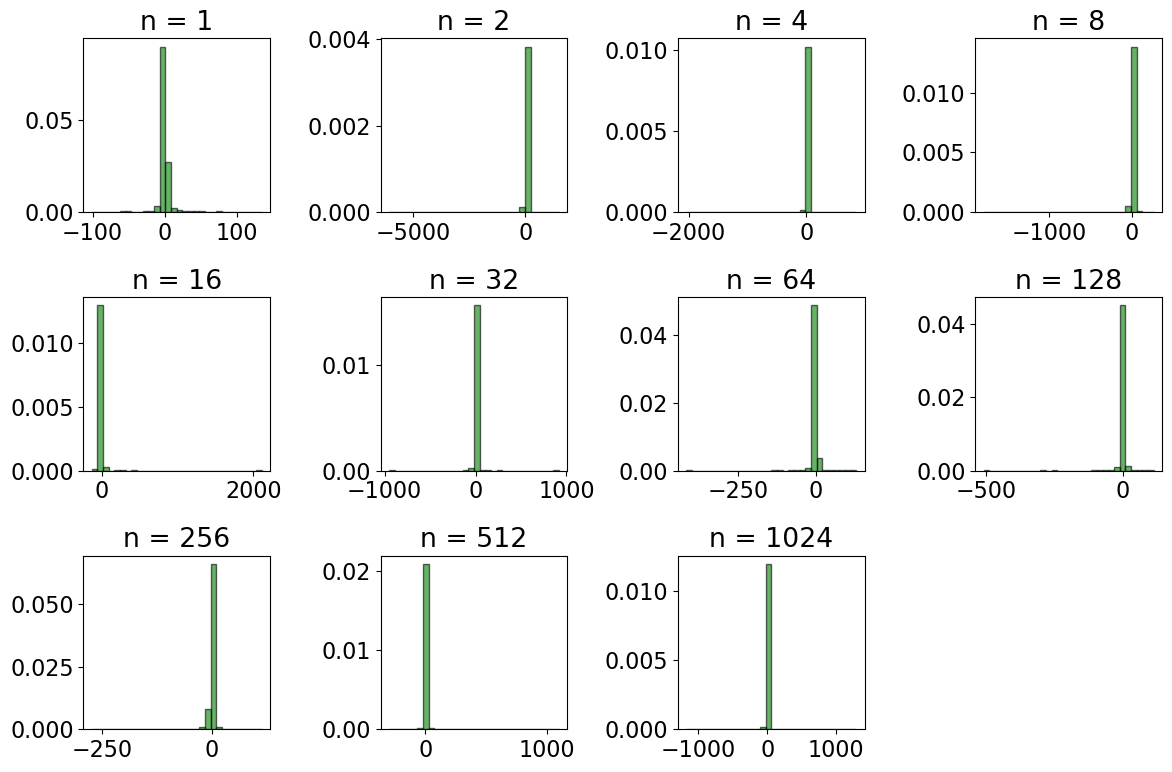

In [10]:
# The Cauchy distribution is an example of this case.
# Despite the increase in n, we don't see the bell-shaped curve typical of the normal distribution, 
# which we would expect if the CLT applied. 
# This happens because the Cauchy distribution does not have a defined variance (it is infinite), 
# and thus does not satisfy the conditions of the CLT.

# Parameters
x_0, gamma = 0, 1  # location and scale for Cauchy
n_values = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
n_sim = 1000

def compute_sample_mean(n):
    samples = np.random.standard_cauchy(size=(n_sim, n))
    sample_means = np.mean(samples, axis=1)  # Computing mean across the correct axis
    return sample_means

# Plotting
plt.figure(figsize=(12, 8))
for i, n in enumerate(n_values):
    plt.subplot(3, 4, i + 1)
    sample_means = compute_sample_mean(n)
    # Make the histograms
    count, bins, ignored = plt.hist(sample_means, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')
    plt.title(f'n = {n}')
    plt.tight_layout()

plt.show()


### Contribution statement

Please include a list of the students you work with along this project (including yourself). Include both names and GitHub usernames of the people you collaborated with. Maximum of three persons per group. 
- Member No1: 
- Member No2: 
- Member No3:

In [11]:
# Hannah Neumann